In [1]:
import numpy as np 
import pandas as pd

In [2]:
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')

In [3]:
display(train_df)

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0
...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,"December 6, 2016",1
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1


# Visualizing the data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

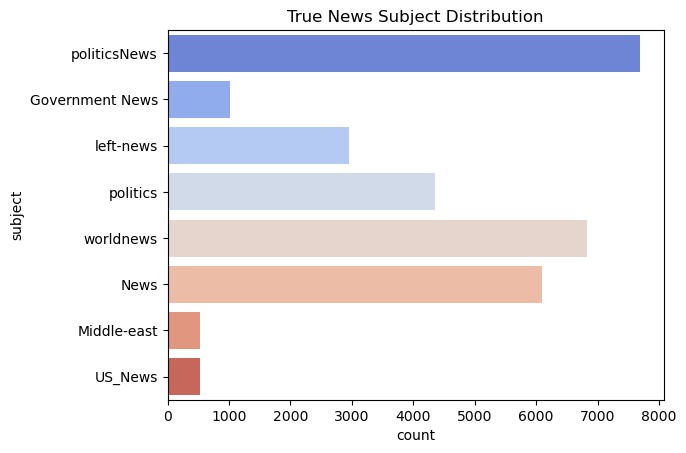

In [5]:
sns.countplot(y="subject", palette="coolwarm", data=train_df).set_title('True News Subject Distribution')
plt.show()

# Data Preprocessing

Inspecting the length of the titles of each news

In [6]:
titles = [text for text in train_df.title]

max_length = 0
titles_length = []
for title in titles:
    titles_length.append(len(title.split()))
    max_length = max(len(title.split()), max_length)
    
print('Total number of titles:', len(titles))
print('Minimum length of a title', max_length)
print('Mean length of all the titles:', np.mean(titles_length))

Total number of titles: 30000
Minimum length of a title 42
Mean length of all the titles: 12.424133333333334


Inspecting the text size

In [7]:
texts = [text for text in train_df.text]

max_length = 0
texts_length = []
for text in texts:
    texts_length.append(len(text.split()))
    max_length = max(len(text.split()), max_length)
    
print('Mean length of all the texts:', np.mean(texts_length))


Mean length of all the texts: 408.54873333333336


# Only keeping the title and label column

In [8]:
train_df = train_df.iloc[:,[1,-1]]
display(train_df)

,title,label
0,Ex-CIA head says Trump remarks on Russia inter...,1
1,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,0
2,Federal Reserve governor Powell's policy views...,1
3,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,0
4,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,0
...,...,...
29995,U.S. aerospace industry urges Trump to help Ex...,1
29996,Highlights: Hong Kong leader Carrie Lam delive...,1
29997,Obama Literally LAUGHS At Claims That Brexit M...,0
29998,Syrian army takes full control of Deir al-Zor ...,1


# Splitting the dataset into Training and Validation set

In [9]:
training_df = train_df.sample(frac = 0.8, random_state=42)
validation_df = train_df.drop(training_df.index)

# Resetting Index
training_df = training_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

print(f"Training set size: {training_df.shape}")
print(f"Validation set size: {validation_df.shape}")

Training set size: (24000, 2)
Validation set size: (6000, 2)


# Converting Dataframe to CSV

In [10]:
training_df.to_csv('training.tsv', sep='\t', index = False)
validation_df.to_csv('validation.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

# Concatenating all dataframes

In [11]:
df = pd.concat([training_df, validation_df, test_df])

In [12]:
df

,title,label,Unnamed: 0,text,subject,date
0,"Senate passes 'provocative' China bill, Cruz l...",1,NaN,NaN,NaN,NaN
1,What a difference a year makes - EU warms to B...,1,NaN,NaN,NaN,NaN
2,ONLY HOURS AFTER DEATH Of Supreme Court Justic...,0,NaN,NaN,NaN,NaN
3,Trump to make announcement on any Comey tapes ...,1,NaN,NaN,NaN,NaN
4,Ruling on Supreme Court Justice Scalia's cause...,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8262,Russian MP says Flynn was forced to resign to ...,1,5469.0,A senior Russian lawmaker said on Tuesday it w...,politicsNews,"February 14, 2017"
8263,Highlights: The Trump presidency on March 7 at...,1,5079.0,Highlights of the day for U.S. President Donal...,politicsNews,"March 7, 2017"
8264,SHOCKER! WAS MUSLIM TERRORIST GAY? Used Gay Da...,0,20425.0,"Of course, Mateen s Muslim father vehemently d...",left-news,"Jun 13, 2016"
8265,John McCain and The Cancer of Conflict,0,22063.0,Patrick Henningsen 21st Century WireThis week ...,US_News,"July 21, 2017"


# Cleaning the data

In [13]:
import nltk # Importing the Natural Language Toolkit
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Obtaining additional stopwards from nltk

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

Removing the stopwords and removing words with character size <=2

In [15]:
import gensim

In [16]:
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    return result

df['clean'] = df['title'].apply(preprocess)

Total words in the dataset

In [17]:
words_list = []
for i in df.clean:
    for j in i:
        words_list.append(j)
total_words = len(list(set(words_list)))
print(f"Total words in the dataset: {total_words}")

Total words in the dataset: 18307


# Performing Tokenization and Padding

In [18]:
from nltk import word_tokenize

In [19]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

Tokenizing the words and and craeating sequences of Tokenized words

In [20]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(training_df['title'])

training_sequences = tokenizer.texts_to_sequences(training_df['title'])
validation_sequences = tokenizer.texts_to_sequences(validation_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

Adding Padding to keep a consistent size

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
padded_training = pad_sequences(training_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_validation = pad_sequences(validation_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# CNN-Bidirectional LSTM Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

c:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
y_training = np.asarray(training_df['label'])
y_validation = np.asarray(validation_df['label'])

model.fit(padded_training, y_training, epochs = 5, batch_size=64, validation_data=(padded_validation, y_validation))

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8315 - loss: 0.3331 - val_accuracy: 0.9667 - val_loss: 0.0939
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9848 - loss: 0.0487 - val_accuracy: 0.9678 - val_loss: 0.0843
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.9702 - val_loss: 0.0915
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9680 - val_loss: 0.1160
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9660 - val_loss: 0.1211


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

prediction = model.predict(padded_test)
prediction = (prediction > 0.5).astype(int)
y_test = np.asarray(test_df['label'])

accuracy = accuracy_score(list(y_test), prediction)
precision = precision_score(list(y_test), prediction)
recall = recall_score(list(y_test), prediction)
f1 = f1_score(list(y_test), prediction)
roc_auc = roc_auc_score(list(y_test), prediction)

print(f"Model Accuracy : {accuracy:3f}")
print(f"Model Precision : {precision:.3f}")
print(f"Model Recall : {recall:.3f}")
print(f"Model F1 Score : {f1:.3f}")
print(f"Model ROC AUC Score : {roc_auc:.3f}")

259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Model Accuracy : 0.970969
Model Precision : 0.978
Model Recall : 0.962
Model F1 Score : 0.970
Model ROC AUC Score : 0.971
